In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from copy import copy
sns.set()

In [28]:
df = pd.read_csv('data-pendulum.csv')
N_Episodes = len(df)
K = True
for i in range(len(df['Exploration rate'])):
    if df['Exploration rate'][i] < 0.0001 and K:
        marker = i
        K = False

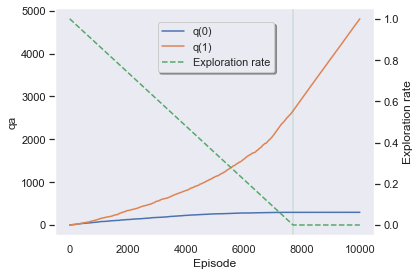

In [35]:

fig, ax1 = plt.subplots()
color = 'k'
ax1.set_ylabel('qa')
ax1.set_xlabel('Episode', color=color)
ax1.plot(range(len(df)),df['q0'],label='q(0)')
ax1.plot(range(len(df)),df['q1'],label='q(1)')
# ax1.plot(range(len(df['Action'])),df['Action'],label='a=1')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Exploration rate', color=color)  # we already handled the x-label with ax1
ax2.plot(range(len(df['q1'])),df['Exploration rate'],'g--', label = 'Exploration rate')
ax2.tick_params(axis='y', labelcolor=color)
plt.axvline(x=marker,color='g',linestyle='-',alpha=0.2)
ax2.grid(False)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.9), shadow=True, ncol=1)
fig.tight_layout()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('plots/Q-Values-Pendulum.pdf')

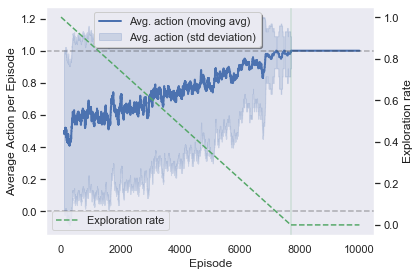

In [30]:
fig, ax1 = plt.subplots()
color = 'k'
window = int(N_Episodes/100)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average Action per Episode', color=color)
smooth_path= df['Action'].rolling(window=window).mean()
path_deviation = df['Action'].rolling(window=window).std()
under_line     = (smooth_path-path_deviation)
over_line      = (smooth_path+path_deviation)
ax1.plot(smooth_path, linewidth=2, label ='Avg. action (moving avg)') #mean curve.
ax1.fill_between(path_deviation.index, under_line, over_line, color='b', alpha=0.2,label ='Avg. action (std deviation)') #std curves.
ax1.axhline(y=1,color='k',linestyle='--',alpha=0.3)
ax1.axhline(y=0,color='k',linestyle='--',alpha=0.3)
ax1.legend(loc='upper center', bbox_to_anchor=(0.4, 1), shadow=True, ncol=1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Exploration rate', color=color)  # we already handled the x-label with ax1
ax2.plot(range(len(df['q1'])),df['Exploration rate'],'g--', label = 'Exploration rate')
ax2.tick_params(axis='y', labelcolor=color)
plt.axvline(x=marker,color='g',linestyle='-',alpha=0.2)
ax2.grid(False)
ax2.legend()
fig.tight_layout()
plt.savefig('plots/Avg-Action-Pendulum.pdf')

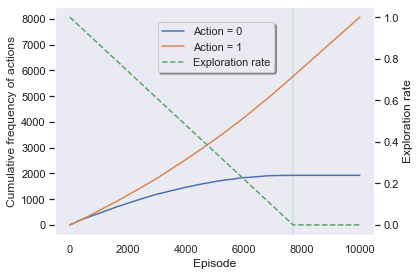

In [31]:
cumulative_frequency_0 = []
cumulative_frequency_1 = []
counter_0 = 0
counter_1 = 1
for i in range(len(df)):
    if df['Action'][i]==0:
        counter_0+=1
    else:
        counter_1+=1
    cumulative_frequency_0.append(counter_0)
    cumulative_frequency_1.append(counter_1)

fig, ax1 = plt.subplots()
color = 'k'
ax1.set_ylabel('Cumulative frequency of actions')
ax1.set_xlabel('Episode', color=color)
ax1.plot(range(len(df['Action'])),cumulative_frequency_0,label='Action = 0')
ax1.plot(range(len(df['Action'])),cumulative_frequency_1,label='Action = 1')
# ax1.plot(range(len(df['Action'])),df['Action'],label='a=1')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Exploration rate', color=color)  # we already handled the x-label with ax1
ax2.plot(range(len(df['q1'])),df['Exploration rate'],'g--', label = 'Exploration rate')
ax2.tick_params(axis='y', labelcolor=color)
plt.axvline(x=marker,color='g',linestyle='-',alpha=0.2)
ax2.grid(False)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.9), shadow=True, ncol=1)
fig.tight_layout()
plt.savefig('plots/Cum-Freq-Pendulum.pdf')

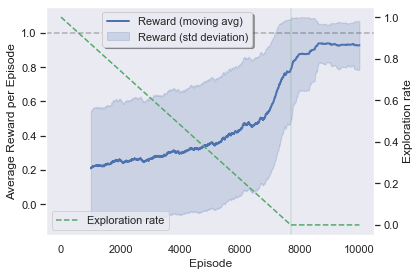

In [32]:
fig, ax1 = plt.subplots()
color = 'k'
window = int(N_Episodes/10)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average Reward per Episode', color=color)
smooth_path= df['Reward'].rolling(window=window).mean()
path_deviation = df['Reward'].rolling(window=window).std()
under_line     = (smooth_path-path_deviation)
over_line      = (smooth_path+path_deviation)
ax1.plot(smooth_path, linewidth=2, label ='Reward (moving avg)') #mean curve.
ax1.fill_between(path_deviation.index, under_line, over_line, color='b', alpha=0.2,label ='Reward (std deviation)') #std curves.
ax1.axhline(y=1,color='k',linestyle='--',alpha=0.3)
ax1.legend(loc='upper center', bbox_to_anchor=(0.4, 1), shadow=True, ncol=1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Exploration rate', color=color)  # we already handled the x-label with ax1
ax2.plot(range(len(df['q1'])),df['Exploration rate'],'g--', label = 'Exploration rate')
ax2.tick_params(axis='y', labelcolor=color)
plt.axvline(x=marker,color='g',linestyle='-',alpha=0.2)
ax2.grid(False)
ax2.legend()
fig.tight_layout()
plt.savefig('plots/Reward-Pendulum.pdf')

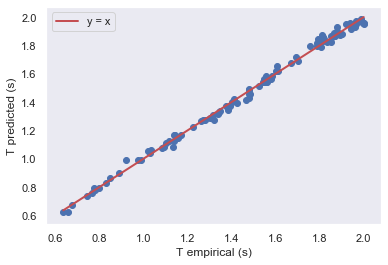

In [33]:
sample_size = 0.01
sample=df.loc[np.r_[N_Episodes-N_Episodes*sample_size:N_Episodes], :]
plt.scatter(sample['Empirical T'],sample['Predicted T'])
x=[min(sample['Empirical T']),max(sample['Empirical T'])]
plt.plot(x,x,'r-',label='y = x',linewidth =2)
plt.ylabel( 'T predicted (s)')
plt.xlabel('T empirical (s)')
plt.legend()
plt.grid(False)
plt.savefig('plots/Empirical-vs-Pred-Pendulum.pdf')

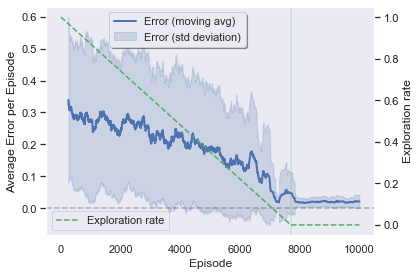

In [34]:
fig, ax1 = plt.subplots()
color = 'k'
window = int(N_Episodes/40)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average Error per Episode', color=color)
error = np.abs(df['Predicted T']- df['Empirical T'])
smooth_path= error.rolling(window=window).mean()
path_deviation = error.rolling(window=window).std()
under_line     = (smooth_path-path_deviation)
over_line      = (smooth_path+path_deviation)
ax1.plot(smooth_path, linewidth=2, label ='Error (moving avg)') #mean curve.
ax1.fill_between(path_deviation.index, under_line, over_line, color='b', alpha=0.2,label ='Error (std deviation)') #std curves.
ax1.axhline(y=0,color='k',linestyle='--',alpha=0.3)
ax1.legend(loc='upper center', bbox_to_anchor=(0.4, 1), shadow=True, ncol=1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Exploration rate', color=color)  # we already handled the x-label with ax1
ax2.plot(range(len(df['q1'])),df['Exploration rate'],'g--', label = 'Exploration rate')
ax2.tick_params(axis='y', labelcolor=color)
plt.axvline(x=marker,color='g',linestyle='-',alpha=0.2)
ax2.grid(False)
ax2.legend()
fig.tight_layout()
plt.savefig('plots/Error-Pendulum.pdf')